O Head de dados pediu para que você construísse uma tabela contendo as seguintes informações:

a. País de origem(Brasil)

b. País de destino

c. Quantidade de litros de vinho exportado (utilize: 1KG = 1L)

d. Valor em US$

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [129]:
espumantes_exp = pd.read_csv("/content/ExpEspumantes.csv", sep = ";")

In [130]:
espumantes_exp

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Alemanha,0,0,0,0,0,0,0,0,...,4092,21373,1003,5466,2388,14767,142,265,1164,6560
1,2,Angola,0,0,0,0,0,0,0,0,...,63,280,1007,3615,24,38,0,0,26383,141588
2,3,Antigua e Barbuda,0,0,0,0,0,0,0,0,...,0,0,7,34,32,328,10,82,65,146
3,4,Antilhas Holandesas,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Argentina,0,0,0,0,0,0,0,0,...,4342,17243,0,0,315,894,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,97,Uruguai,0,0,0,0,0,0,0,0,...,9265,34039,2808,15045,1796,15322,0,0,10200,87895
97,98,Vanuatu,0,0,0,0,0,0,0,0,...,0,0,0,0,14,31,0,0,0,0
98,99,Venezuela,0,0,0,0,0,0,0,0,...,5,10,450,2670,0,0,0,0,0,0
99,100,Vietnã,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,144,374,16,19


In [131]:
espumantes_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Columns: 108 entries, Id to 2022.1
dtypes: int64(107), object(1)
memory usage: 85.3+ KB


In [132]:
espumantes_exp.T.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
Id,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,101
País,Alemanha,Angola,Antigua e Barbuda,Antilhas Holandesas,Argentina,Aruba,Australia,Bahamas,Bangladesh,Barbados,...,Suriname,Tailandia,Taiwan (Formosa),Trinidade e Tobago,Turquia,Uruguai,Vanuatu,Venezuela,Vietnã,Outros(1)
1970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5132
1970.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3208
1971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
espumantes_exp.columns

Index(['Id', 'País', '1970', '1970.1', '1971', '1971.1', '1972', '1972.1',
       '1973', '1973.1',
       ...
       '2018', '2018.1', '2019', '2019.1', '2020', '2020.1', '2021', '2021.1',
       '2022', '2022.1'],
      dtype='object', length=108)

In [134]:
espumantes_exp = espumantes_exp.drop("Id", axis=1) # removendo a coluna Id
espumantes_exp.head()

,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,Alemanha,0,0,0,0,0,0,0,0,0,...,4092,21373,1003,5466,2388,14767,142,265,1164,6560
1,Angola,0,0,0,0,0,0,0,0,0,...,63,280,1007,3615,24,38,0,0,26383,141588
2,Antigua e Barbuda,0,0,0,0,0,0,0,0,0,...,0,0,7,34,32,328,10,82,65,146
3,Antilhas Holandesas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Argentina,0,0,0,0,0,0,0,0,0,...,4342,17243,0,0,315,894,0,0,0,0


In [135]:
espumantes_exp = espumantes_exp.set_index("País") #definindo os países como índice
espumantes_exp.head()

,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
País,,,,,,,,,,,,,,,,,,,,,
Alemanha,0,0,0,0,0,0,0,0,0,0,...,4092,21373,1003,5466,2388,14767,142,265,1164,6560
Angola,0,0,0,0,0,0,0,0,0,0,...,63,280,1007,3615,24,38,0,0,26383,141588
Antigua e Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,7,34,32,328,10,82,65,146
Antilhas Holandesas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Argentina,0,0,0,0,0,0,0,0,0,0,...,4342,17243,0,0,315,894,0,0,0,0


<Axes: >

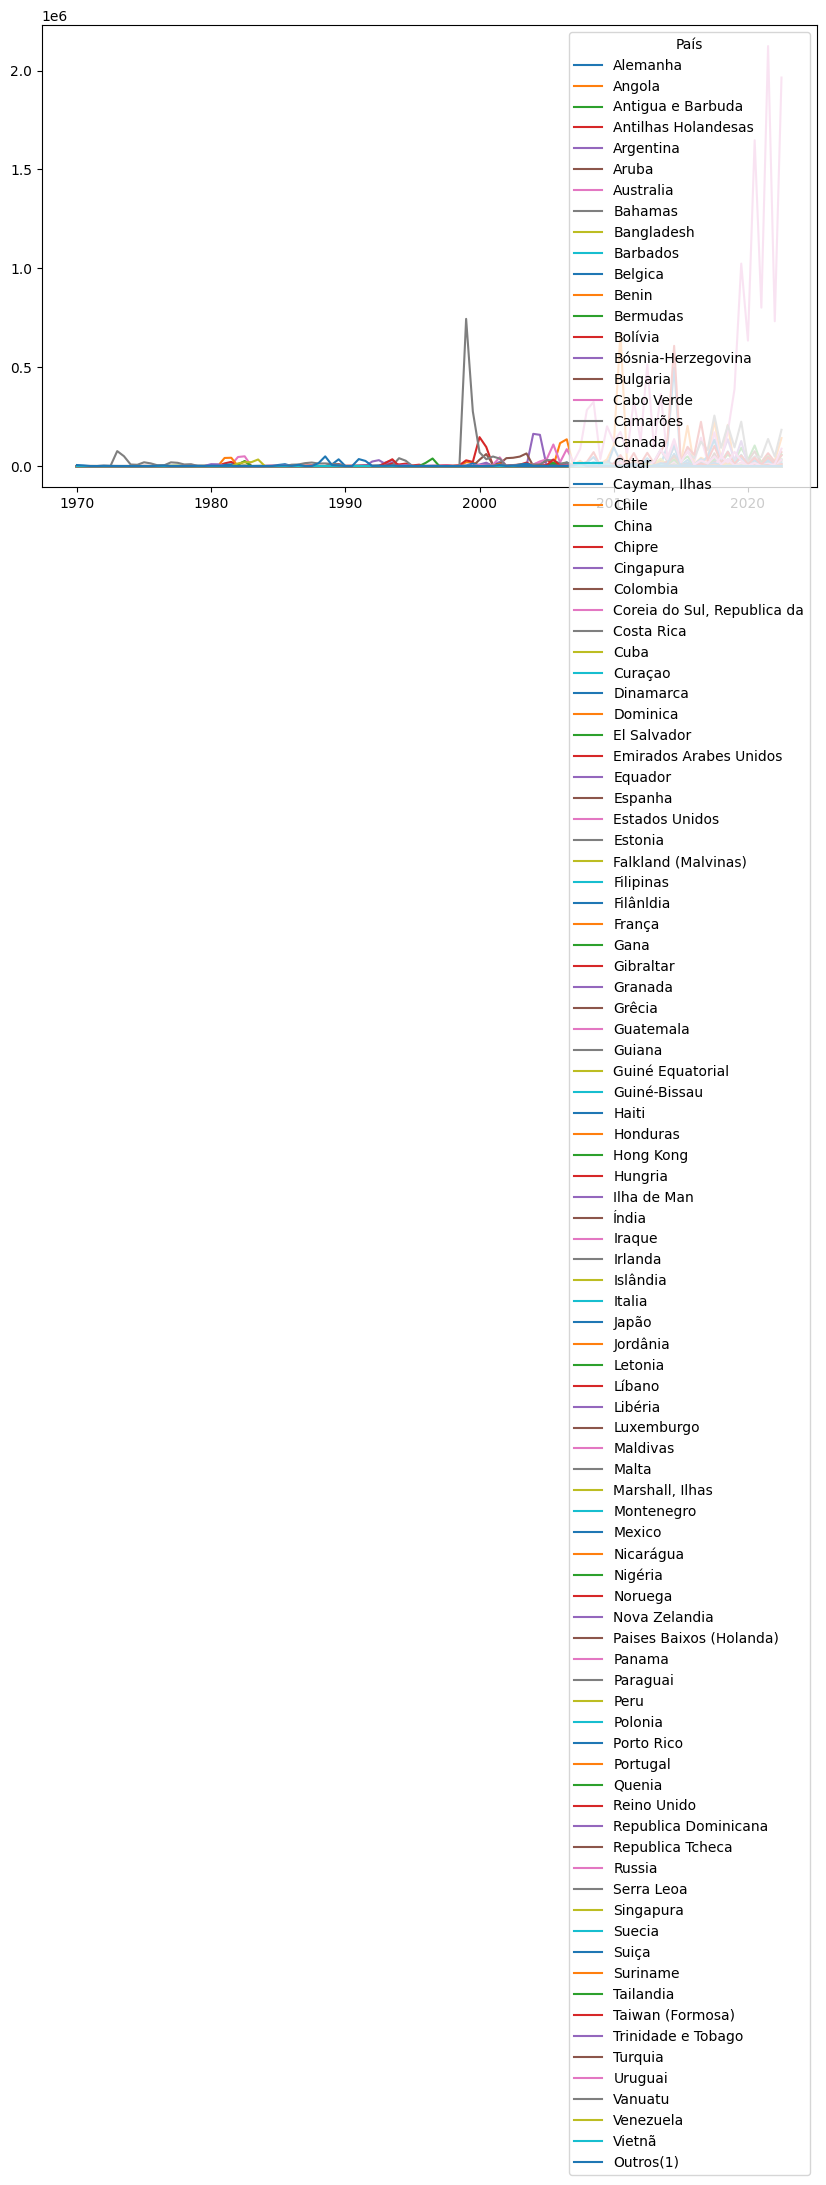

In [136]:
espumantes_exp.T.plot(figsize=(10,6))
# conseguimos notar que os dados começam a ser constantes a partir dos anos 2000,
# então decidi usar apenas os dados dos últimos 20 anos

In [137]:
espumantes_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, Alemanha to Outros(1)
Columns: 106 entries, 1970 to 2022.1
dtypes: int64(106)
memory usage: 88.5+ KB


In [138]:
espumantes_exp.mean()

1970         55.277228
1970.1       33.504950
1971          5.049505
1971.1        2.910891
1972         34.326733
              ...     
2020.1    21268.524752
2021       9259.831683
2021.1    25701.683168
2022       9206.584158
2022.1    28374.099010
Length: 106, dtype: float64

In [139]:
espumantes_usaveis = espumantes_exp.mean().index.tolist()

In [140]:
espumantes_usaveis = espumantes_exp.columns[-40:]

In [141]:
espumantes_usaveis.insert(0, "País")

Index(['País', '2003', '2003.1', '2004', '2004.1', '2005', '2005.1', '2006',
       '2006.1', '2007', '2007.1', '2008', '2008.1', '2009', '2009.1', '2010',
       '2010.1', '2011', '2011.1', '2012', '2012.1', '2013', '2013.1', '2014',
       '2014.1', '2015', '2015.1', '2016', '2016.1', '2017', '2017.1', '2018',
       '2018.1', '2019', '2019.1', '2020', '2020.1', '2021', '2021.1', '2022',
       '2022.1'],
      dtype='object')

In [142]:
espumantes = espumantes_exp[espumantes_usaveis]

In [143]:
espumantes.head()

,2003,2003.1,2004,2004.1,2005,2005.1,2006,2006.1,2007,2007.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
País,,,,,,,,,,,,,,,,,,,,,
Alemanha,0,0,730,3045,549,2670,153,928,3547,10192,...,4092,21373,1003,5466,2388,14767,142,265,1164,6560
Angola,368,367,793,1040,419,656,3314,6657,6293,26252,...,63,280,1007,3615,24,38,0,0,26383,141588
Antigua e Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,7,34,32,328,10,82,65,146
Antilhas Holandesas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Argentina,0,0,162827,157912,0,0,0,0,0,0,...,4342,17243,0,0,315,894,0,0,0,0


In [144]:
espumantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, Alemanha to Outros(1)
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2003    101 non-null    int64
 1   2003.1  101 non-null    int64
 2   2004    101 non-null    int64
 3   2004.1  101 non-null    int64
 4   2005    101 non-null    int64
 5   2005.1  101 non-null    int64
 6   2006    101 non-null    int64
 7   2006.1  101 non-null    int64
 8   2007    101 non-null    int64
 9   2007.1  101 non-null    int64
 10  2008    101 non-null    int64
 11  2008.1  101 non-null    int64
 12  2009    101 non-null    int64
 13  2009.1  101 non-null    int64
 14  2010    101 non-null    int64
 15  2010.1  101 non-null    int64
 16  2011    101 non-null    int64
 17  2011.1  101 non-null    int64
 18  2012    101 non-null    int64
 19  2012.1  101 non-null    int64
 20  2013    101 non-null    int64
 21  2013.1  101 non-null    int64
 22  2014    101 non-null    int64
 23  2014.1 

In [152]:
# Os anos na tabela que contém .1 correspondem a valor em US$
valor_espumantes = espumantes[["2003.1", "2004.1", "2005.1", "2006.1", "2007.1",
                               "2008.1", "2009.1", "2010.1","2011.1", "2012.1",
                               "2013.1", "2014.1", "2015.1", "2016.1", "2017.1",
                               "2018.1", "2019.1", "2020.1", "2021.1", "2022.1"]]

In [156]:
valor_espumantes["Total"] = valor_espumantes.sum(axis=1)

<ipython-input-156-848027863a5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valor_espumantes["Total"] = valor_espumantes.sum(axis=1)


In [157]:
valor_espumantes.head()

,2003.1,2004.1,2005.1,2006.1,2007.1,2008.1,2009.1,2010.1,2011.1,2012.1,...,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1,Total
País,,,,,,,,,,,,,,,,,,,,,
Alemanha,0,3045,2670,928,10192,20928,29018,6877,12018,5072,...,62169,30939,19088,28799,21373,5466,14767,265,6560,310635
Angola,367,1040,656,6657,26252,10581,33664,672533,14196,1426,...,22423,0,1010,0,280,3615,38,0,141588,957386
Antigua e Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,34,328,82,146,590
Antilhas Holandesas,0,0,0,0,0,0,1660,0,65766,0,...,0,0,0,0,0,0,0,0,0,67426
Argentina,0,157912,0,0,0,0,0,0,0,0,...,0,0,0,0,17243,0,894,0,0,176049


In [160]:
# aqui encontramos os 10 países que gastaram mais com a importação de espumantes brasileiros nos últimos 20 anos
valor_ordenado_espumantes = valor_espumantes.sort_values(by="Total", ascending=False)
valor_ordenado_espumantes.head(10)

,2003.1,2004.1,2005.1,2006.1,2007.1,2008.1,2009.1,2010.1,2011.1,2012.1,...,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1,Total
País,,,,,,,,,,,,,,,,,,,,,
Estados Unidos,3,23567,108893,85474,86898,324094,200975,172488,333438,513426,...,136533,92868,143306,170620,172961,1023709,1647310,2123710,1964451,9688860
Reino Unido,0,0,33221,3546,9260,70326,0,55256,8040,66897,...,607711,97055,223774,101672,72651,54428,42414,45041,53968,1619201
Paraguai,1124,7385,29363,17950,6958,8088,18376,24228,8531,10442,...,96500,70845,123169,255320,205510,224306,48614,136909,183187,1558126
Angola,367,1040,656,6657,26252,10581,33664,672533,14196,1426,...,22423,0,1010,0,280,3615,38,0,141588,957386
Belgica,0,0,0,18128,2304,682,0,49742,0,40086,...,499164,5280,0,2646,10555,11405,0,0,0,646070
Chile,0,2325,0,135356,6840,0,8613,0,0,10143,...,0,0,41824,231696,208521,0,346,361,19,646044
Japão,11530,6190,7750,1456,5314,3578,8650,15240,2480,8217,...,104395,18118,14766,133203,34532,41567,28930,27860,12049,569270
Uruguai,0,143,0,2862,0,0,0,21325,0,0,...,128510,74551,28085,48581,34039,15045,15322,0,87895,539112
China,0,0,0,0,464,0,0,1566,8342,25604,...,35190,48739,20931,35671,58871,91922,103986,49572,35079,522509


In [154]:
litros_espumantes = espumantes[["2003", "2004", "2005", "2006", "2007", "2008",
                                "2009", "2010","2011", "2012", "2013", "2014",
                                "2015", "2016", "2017", "2018", "2019", "2020",
                                "2021", "2022"]]

In [161]:
litros_espumantes["Total"] = valor_espumantes.sum(axis=1)

<ipython-input-161-0c672d4726e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  litros_espumantes["Total"] = valor_espumantes.sum(axis=1)


In [162]:
litros_espumantes.head()

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
País,,,,,,,,,,,,,,,,,,,,,
Alemanha,0,730,549,153,3547,5423,6648,1958,1976,833,...,9236,6256,4293,4824,4092,1003,2388,142,1164,621270
Angola,368,793,419,3314,6293,2244,11393,104138,904,73,...,6866,0,90,0,63,1007,24,0,26383,1914772
Antigua e Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7,32,10,65,1180
Antilhas Holandesas,0,0,0,0,0,0,180,0,9144,0,...,0,0,0,0,0,0,0,0,0,134852
Argentina,0,162827,0,0,0,0,0,0,0,0,...,0,0,0,0,4342,0,315,0,0,352098


In [163]:
# e aqui os 10 países que importaram mais litros de espumantes brasileiros nos últimos 20 anos
litros_ordenado_espumantes = litros_espumantes.sort_values(by="Total", ascending=False)
litros_ordenado_espumantes.head(10)

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
País,,,,,,,,,,,,,,,,,,,,,
Estados Unidos,7,7010,33941,19131,21400,283760,35695,123001,67547,126129,...,39748,18450,22615,22605,28542,389511,634243,801082,732209,19377720
Reino Unido,0,0,4678,1080,3166,20880,0,13501,1980,11896,...,131483,16511,56615,27700,14626,11049,8084,7130,9305,3238402
Paraguai,1670,8342,30133,12153,3455,4637,20099,6728,2513,3568,...,28038,29016,40197,80951,92114,94620,16231,45629,48160,3116252
Angola,368,793,419,3314,6293,2244,11393,104138,904,73,...,6866,0,90,0,63,1007,24,0,26383,1914772
Belgica,0,0,0,3375,540,112,0,12897,0,7404,...,104153,900,0,450,1800,1869,0,0,0,1292140
Chile,0,678,0,115900,855,0,1673,0,0,811,...,0,0,10340,25439,25481,0,90,72,4,1292088
Japão,7920,1800,2250,378,1395,964,2900,4737,632,1197,...,22290,1826,3658,48604,7853,10242,7294,6811,2970,1138540
Uruguai,0,143,0,1075,0,0,0,472,0,0,...,34463,19574,7656,13237,9265,2808,1796,0,10200,1078224
China,0,0,0,0,75,0,0,416,1682,3219,...,5959,23520,4610,11646,19490,26247,29921,13692,8619,1045018


In [164]:
litros_ordenado_espumantes = litros_ordenado_espumantes.drop(["Total"], axis=1)

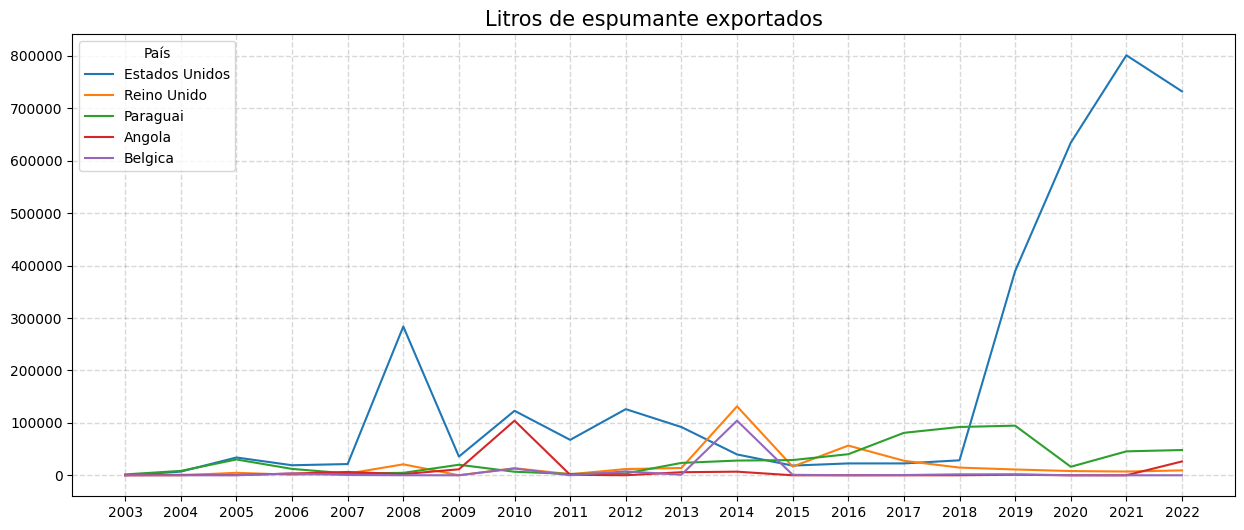

In [176]:
litros_ordenado_espumantes.head(5).T.plot(figsize=(15,6))
plt.title("Litros de espumante exportados", fontsize=15)
anos = range(2003, 2023)
plt.xticks(ticks=range(0,len(anos)* 1,1), labels=anos)
plt.grid(color = 'gray', linestyle= '--', linewidth = 1, alpha = 0.3)
plt.show()

In [177]:
valor_ordenado_espumantes = valor_ordenado_espumantes.drop(["Total"], axis=1)

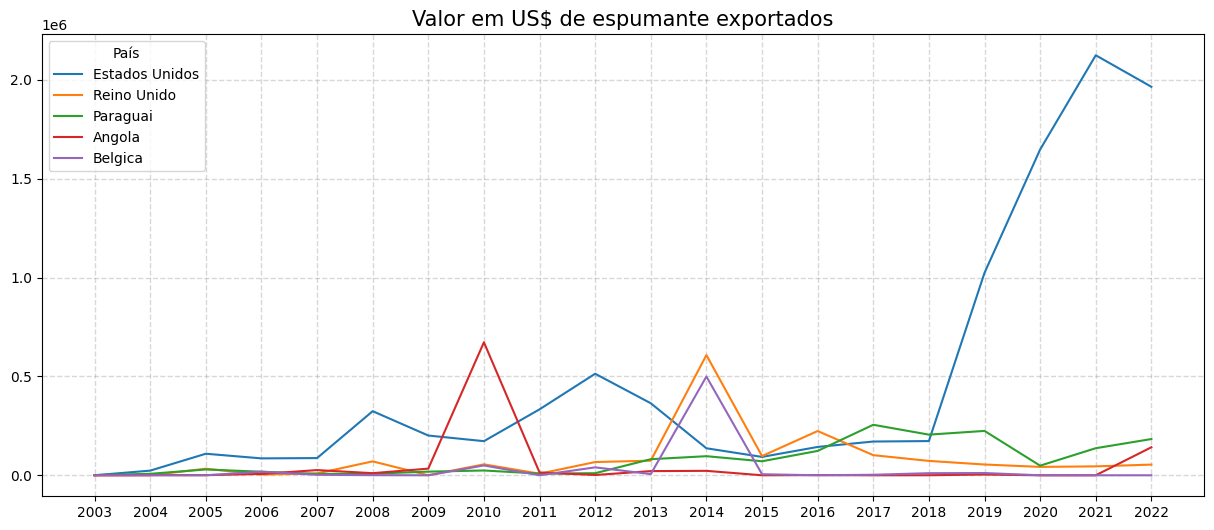

In [179]:
valor_ordenado_espumantes.head(5).T.plot(figsize=(15,6))
plt.title("Valor em US$ de espumante exportados", fontsize=15)
anos = range(2003, 2023)
plt.xticks(ticks=range(0,len(anos)* 1,1), labels=anos)
plt.grid(color = 'gray', linestyle= '--', linewidth = 1, alpha = 0.3)
plt.show()